## Лабораторная работа №16. Нелинейные методы понижения размерности.

Используемый набор данных: [Iris](https://archive.ics.uci.edu/ml/datasets/Iris)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/"
downloadFile(url + "/iris.data", "dataset/iris.data")
downloadFile(url + "/iris.names", "dataset/iris.names")

In [3]:
headers = ["Sepal length", "Sepal width", "Petal length", "Petal width", "Class"]
data = pd.read_csv("dataset/iris.data", names=headers, index_col=None)
data["Class"] = data["Class"].astype("category")
data.sample(20)

,Sepal length,Sepal width,Petal length,Petal width,Class
49,5.0,3.3,1.4,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica
132,6.4,2.8,5.6,2.2,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica
113,5.7,2.5,5.0,2.0,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor


In [4]:
display(data.describe())
display(data.isna().sum())

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class           0
dtype: int64

Выполним понижение размерности до двухмерного пространства с помощью нелинейного метода [t-SNE](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B2%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9_%D1%81_t-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%D0%BC).

In [5]:
X = data.drop(columns=["Class"]).copy()
y = data["Class"]

tsne = TSNE(n_components=2, n_iter=1000, random_state=25)
points = tsne.fit_transform(X)

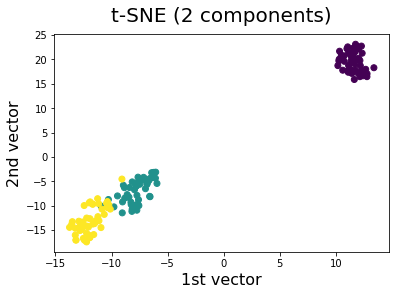

In [6]:
def draw_plot(X, y, c):
    title = "t-SNE (2 components)"
    
    plt.scatter(X, y, c=c, label=title)
    
    plt.title(title, fontsize=20, y=1.03)
    plt.xlabel("1st vector", fontsize=16)
    plt.ylabel("2nd vector", fontsize=16)

draw_plot(points[:, 0], points[:, 1], data["Class"].cat.codes)